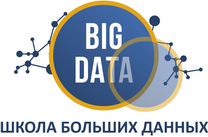

[перейти](https://www.bigdataschool.ru/)

In [1]:
%pip install pymorphy2 nltk
import pandas as pd 
import numpy as np
import nltk
import re
import csv
from nltk.stem import WordNetLemmatizer
import sklearn
import codecs
import pymorphy2
import seaborn as sns
sns.set_style("darkgrid")
from nltk.stem.snowball import SnowballStemmer

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Функции

In [3]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('russian'))

def csv_to_list(arr):
    arr_list = []
    for row in arr:
        arr_list.append(list_to_str(row))
    return arr_list

def list_to_str(arr):
    str_ = ''
    for rec in arr:
        str_+=rec
    return str_

def df_preprocess(text):  
    reg = re.compile('[^а-яА-яa-zA-Z0-9 ]') #
    text = text.lower().replace("ё", "е")
    text = text.replace("ъ", "ь")
    text = text.replace("й", "и")
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'сайт', text)
    text = re.sub('@[^\s]+', 'пользователь', text)
    text = reg.sub(' ', text)
    
    # Лемматизация
    #morph = pymorphy2.MorphAnalyzer()
    #text =[morph.parse(word)[0].normal_form for word in text.split()]

    # Стемминг
    # stemmer = SnowballStemmer("russian")
    # text =[stemmer.stem(word) for word in text.split()]

    # Стемминг + удаление стоп слов
    stemmer = SnowballStemmer("russian")
    #text =[stemmer.stem(word) for word in text.split() if word not in stopWords]
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stopWords])

    return text

### Считываем данные

Используем корпус с сайта https://study.mokoron.com/#download

In [4]:
positive_recalls = csv_to_list(csv.reader(codecs.open('data/positive_recalls.csv', 'rU', 'utf-8', errors='ignore')))
negative_recalls = csv_to_list(csv.reader(codecs.open('data/negative_recalls.csv', 'rU', 'utf-8', errors='ignore')))

### Формируем датасет 

In [5]:
df_positive_recalls = pd.DataFrame(positive_recalls, columns=['recall'])
df_positive_recalls['type']=1
df_positive_recalls.head()

,recall,type
0,@first_timee хоть я и школота но поверь у нас ...,1
1,Да все-таки он немного похож на него. Но мой м...,1
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",1
4,@irina_dyshkant Вот что значит страшилка :D\nН...,1


In [6]:
df_negative_recalls = pd.DataFrame(negative_recalls, columns=['recall'])
df_negative_recalls['type']=0
df_negative_recalls.head()

,recall,type
0,на работе был полный пиддес :| и так каждое за...,0
1,Коллеги сидят рубятся в Urban terror а я из-за...,0
2,@elina_4post как говорят обещаного три года жд...,0
3,Желаю хорошего полёта и удачной посадкия буду ...,0
4,Обновил за каким-то лешим surf теперь не работ...,0


In [7]:
# Объединяем два датафрейма вместе
df_recalls = pd.concat((df_negative_recalls, df_positive_recalls),axis = 0).sample(frac = 1.0) # объединяем и перемешиваем
df_recalls.index = range(0,len(df_recalls))
df_recalls.head()

,recall,type
0,А теперь я зашла в Accessories и купила еще ша...,1
1,RT @tolik4ek: По-моему Кличко начинает выходит...,1
2,"sm&amp;gt; напомни, как называется: фотка, вок...",0
3,RT @PssLevl: @KomarovskiMusic момент начала др...,1
4,@Marina_0834 мне уже кроме тебя никто не напом...,1


### Удалим стоп слова

In [8]:
stopWords = set(stopwords.words('russian'))

In [9]:
stopWords

{'а',
 'без',
 'более',
 'больше',
 'будет',
 'будто',
 'бы',
 'был',
 'была',
 'были',
 'было',
 'быть',
 'в',
 'вам',
 'вас',
 'вдруг',
 'ведь',
 'во',
 'вот',
 'впрочем',
 'все',
 'всегда',
 'всего',
 'всех',
 'всю',
 'вы',
 'где',
 'да',
 'даже',
 'два',
 'для',
 'до',
 'другой',
 'его',
 'ее',
 'ей',
 'ему',
 'если',
 'есть',
 'еще',
 'ж',
 'же',
 'за',
 'зачем',
 'здесь',
 'и',
 'из',
 'или',
 'им',
 'иногда',
 'их',
 'к',
 'как',
 'какая',
 'какой',
 'когда',
 'конечно',
 'кто',
 'куда',
 'ли',
 'лучше',
 'между',
 'меня',
 'мне',
 'много',
 'может',
 'можно',
 'мой',
 'моя',
 'мы',
 'на',
 'над',
 'надо',
 'наконец',
 'нас',
 'не',
 'него',
 'нее',
 'ней',
 'нельзя',
 'нет',
 'ни',
 'нибудь',
 'никогда',
 'ним',
 'них',
 'ничего',
 'но',
 'ну',
 'о',
 'об',
 'один',
 'он',
 'она',
 'они',
 'опять',
 'от',
 'перед',
 'по',
 'под',
 'после',
 'потом',
 'потому',
 'почти',
 'при',
 'про',
 'раз',
 'разве',
 'с',
 'сам',
 'свою',
 'себе',
 'себя',
 'сейчас',
 'со',
 'совсем',
 'так

### Очитска текста приведение слов к стандартному виду

In [11]:
df_recalls['recall'] = df_recalls['recall'].apply(df_preprocess)

In [12]:
df_recalls.head()

,recall,type
0,зашл accessories куп шапк оказа мило,1
1,rt пользовател мо кличк начина выход бо собчак...,1
2,sm amp gt напомн называ фотк вокруг черн рамк ...,0
3,rt пользовател пользовател момент нача дроп ям...,1
4,пользовател кром никт напомина,1


### Train/test split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_recalls['recall'], df_recalls['type'], test_size=.15, random_state=42)


In [14]:
type(X_train)

pandas.core.series.Series

In [15]:
print(len(X_train), len(X_test))

192808 34026


In [16]:
X_train[100]

'пользовател так провокатор украин имеют никак отношен туп дартанянств дер дер'

In [17]:
y_train[100]

0

### BOW

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

X_train_BOW = vectorizer.fit_transform(X_train)
X_test_BOW = vectorizer.transform(X_test)

In [19]:
print(X_train_BOW.shape, X_test_BOW.shape)

(192808, 110540) (34026, 110540)


In [20]:
X_train.iloc[200]

'пользовател хах истин глагол'

In [21]:
# Векторное представление
X_train_BOW[200]

<1x110540 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

### TF-IDF

In [22]:
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_TFIDF = vectorizer.fit_transform(X_train)
X_test_TFIDF = vectorizer.transform(X_test)

In [23]:
print(X_train_TFIDF.shape, X_test_TFIDF.shape)

(192808, 110540) (34026, 110540)


In [24]:
# Векторное представление
X_train_TFIDF[200]

<1x110540 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

### Строим простейшую модель

#### На данных BOW

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [26]:
# обучаем классификатор
%time clf = LogisticRegression(random_state=0).fit(X_train_BOW, y_train)

CPU times: user 7.83 s, sys: 104 ms, total: 7.94 s
Wall time: 4.14 s


/home/ec2-user/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
# вычисляем предсказания
y_predict_BOW = clf.predict(X_test_BOW)

In [28]:
# вычисляем метрику accuracy
accuracy_score(y_predict_BOW, y_test)

0.7360547816375713

#### На данных TF-IDF

In [29]:
%time clf = LogisticRegression(random_state=43).fit(X_train_TFIDF, y_train)

CPU times: user 8.12 s, sys: 96.1 ms, total: 8.22 s
Wall time: 4.2 s


/home/ec2-user/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
y_predict_TFIDF = clf.predict(X_test_TFIDF)

In [31]:
accuracy_score(y_predict_TFIDF, y_test)

0.732410509610298

#### На данных BOW с биграммами

In [32]:
#-----------------------------------------------
vectorizer = CountVectorizer(ngram_range=(1, 2))
#-----------------------------------------------
X_train_BOW_bi = vectorizer.fit_transform(X_train)
X_test_BOW_bi = vectorizer.transform(X_test)
#-----------------------------------------------
print(X_train_BOW_bi.shape, X_test_BOW_bi.shape)
#-----------------------------------------------
clf = LogisticRegression(random_state=0).fit(X_train_BOW_bi, y_train)
#-----------------------------------------------
y_predict_BOW_bi = clf.predict(X_test_BOW_bi)
#-----------------------------------------------
accuracy_score(y_predict_BOW_bi, y_test)

(192808, 893952) (34026, 893952)


/home/ec2-user/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7522776700170458

### Построить линейные модели на данных датасета ""20 News Groups" для любых 2х категорий новостей
- на предобработанном датасете оставить только 2 группы новостей;
- преобразовать данные алгоритмами BOW и TF-IDF;
- построить модель логистической регрессии на полученных данных;
- построить модель логистической регрессии на биграммах BOW.